In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [48]:
df = pd.read_csv("ecommerce_customer_data_large.csv")

In [49]:
df.head(10)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0
5,13738,2022-08-25 06:48:33,Home,191,3,3722,Credit Card,27,1.0,Lauren Johnson,27,Female,0
6,13738,2023-07-25 05:17:24,Electronics,205,1,2773,Credit Card,27,NaN,Lauren Johnson,27,Female,0
7,13738,2023-02-05 19:31:48,Books,370,5,1486,Cash,27,1.0,Lauren Johnson,27,Female,0
8,13738,2021-12-21 03:29:05,Home,12,2,2175,Cash,27,NaN,Lauren Johnson,27,Female,0
9,13738,2023-02-09 00:53:14,Electronics,40,4,4327,Cash,27,0.0,Lauren Johnson,27,Female,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [51]:
df["Returns"].unique()

array([ 1.,  0., nan])

In [52]:
df["Age"].unique()

array([31, 27, 20, 53, 57, 34, 45, 18, 54, 21, 50, 24, 48, 67, 70, 51, 38,
       23, 66, 43, 37, 19, 65, 35, 56, 55, 62, 39, 64, 40, 49, 59, 61, 28,
       30, 58, 42, 44, 60, 69, 41, 25, 26, 33, 46, 68, 36, 52, 32, 63, 29,
       47, 22], dtype=int64)

In [53]:
df["Customer Age"].unique()

array([31, 27, 20, 53, 57, 34, 45, 18, 54, 21, 50, 24, 48, 67, 70, 51, 38,
       23, 66, 43, 37, 19, 65, 35, 56, 55, 62, 39, 64, 40, 49, 59, 61, 28,
       30, 58, 42, 44, 60, 69, 41, 25, 26, 33, 46, 68, 36, 52, 32, 63, 29,
       47, 22], dtype=int64)

In [54]:
df = df.drop(["Customer Age"], axis=1)

In [55]:
df.drop_duplicates(inplace=True)

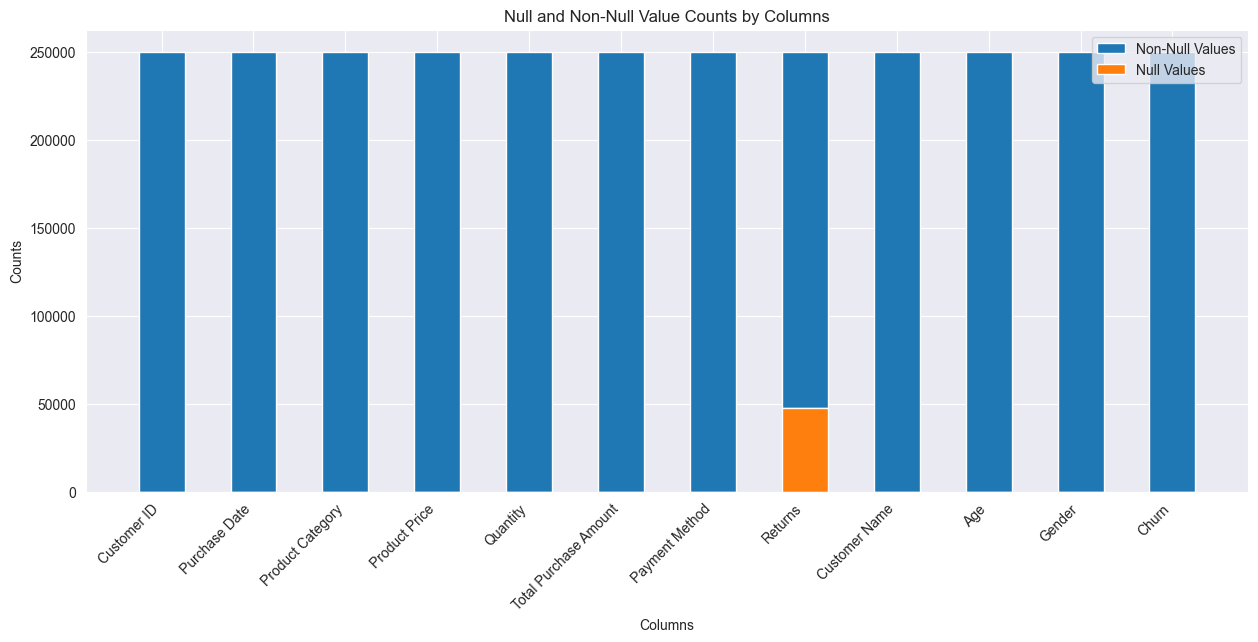

In [56]:
null_counts = df.isnull().sum()
not_null_counts = df.notnull().sum()

# Plotting a histogram for the null and non-null value counts
fig, ax = plt.subplots(figsize=(15, 6))
index = df.columns
bar_width = 0.5

rects1 = ax.bar(index, not_null_counts, bar_width, bottom=null_counts, label='Non-Null Values')
rects2 = ax.bar(index, null_counts, bar_width, label='Null Values')

ax.set_xlabel('Columns')
ax.set_ylabel('Counts')
ax.set_title('Null and Non-Null Value Counts by Columns')
ax.legend()

plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

plt.show()

In [57]:
df.isnull().sum()

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

In [58]:
df["Returns"] = df["Returns"].map(lambda x: "no" if x == 0 else "yes" if x == 1 else "unknown")
df["Churn"] = df["Churn"].map(lambda x: "no" if x == 0 else "yes" if x == 1 else "unknown")
df

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,yes,John Rivera,31,Female,no
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,yes,John Rivera,31,Female,no
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,yes,John Rivera,31,Female,no
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,no,John Rivera,31,Female,no
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,yes,John Rivera,31,Female,no
...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33807,2023-01-24 12:32:18,Home,436,1,3664,Cash,no,Gabriel Williams,63,Male,no
249996,20455,2021-06-04 05:45:25,Electronics,233,1,4374,Credit Card,yes,Barry Foster,66,Female,no
249997,28055,2022-11-10 17:11:57,Electronics,441,5,5296,Cash,unknown,Lisa Johnson,63,Female,no
249998,15023,2021-06-27 14:42:12,Electronics,44,2,2517,Cash,yes,Melissa Fernandez,64,Male,no


In [59]:
df.isnull().sum()

Customer ID              0
Purchase Date            0
Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
Payment Method           0
Returns                  0
Customer Name            0
Age                      0
Gender                   0
Churn                    0
dtype: int64

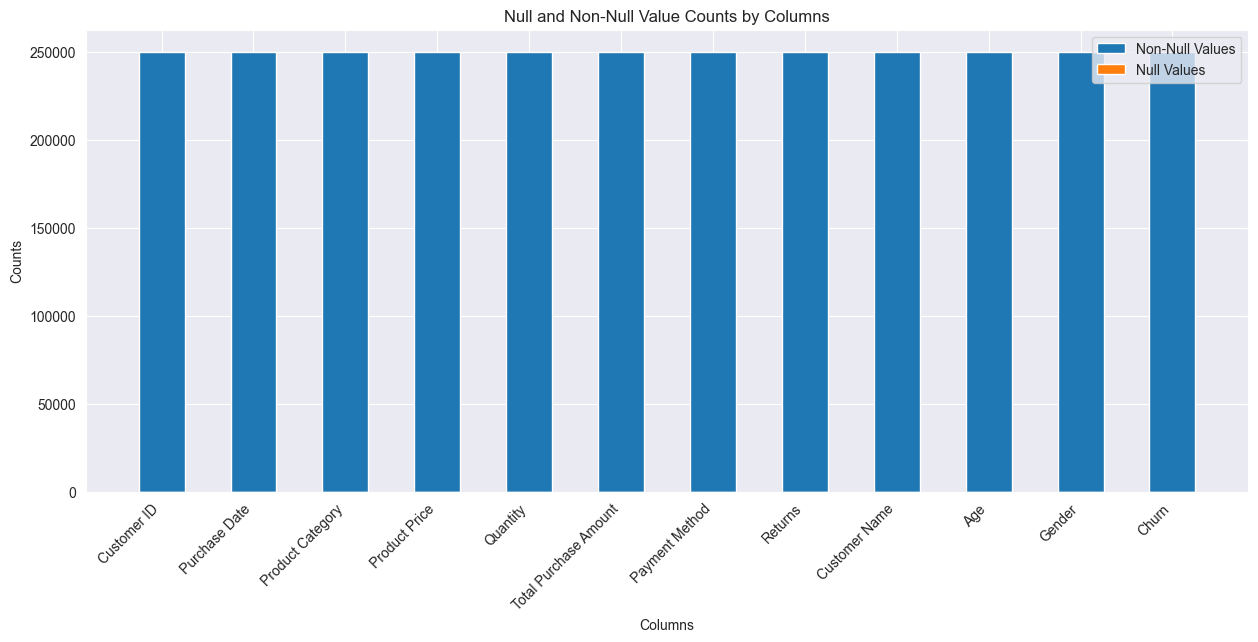

In [60]:
null_counts = df.isnull().sum()
not_null_counts = df.notnull().sum()

# Plotting a histogram for the null and non-null value counts
fig, ax = plt.subplots(figsize=(15, 6))
index = df.columns
bar_width = 0.5

rects1 = ax.bar(index, not_null_counts, bar_width, bottom=null_counts, label='Non-Null Values')
rects2 = ax.bar(index, null_counts, bar_width, label='Null Values')

ax.set_xlabel('Columns')
ax.set_ylabel('Counts')
ax.set_title('Null and Non-Null Value Counts by Columns')
ax.legend()

plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

plt.show()

In [61]:
df

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,yes,John Rivera,31,Female,no
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,yes,John Rivera,31,Female,no
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,yes,John Rivera,31,Female,no
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,no,John Rivera,31,Female,no
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,yes,John Rivera,31,Female,no
...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33807,2023-01-24 12:32:18,Home,436,1,3664,Cash,no,Gabriel Williams,63,Male,no
249996,20455,2021-06-04 05:45:25,Electronics,233,1,4374,Credit Card,yes,Barry Foster,66,Female,no
249997,28055,2022-11-10 17:11:57,Electronics,441,5,5296,Cash,unknown,Lisa Johnson,63,Female,no
249998,15023,2021-06-27 14:42:12,Electronics,44,2,2517,Cash,yes,Melissa Fernandez,64,Male,no


In [62]:
# df["Purchase Date"] = pd.to_datetime(df["Purchase Date"])
# 
# df["Purchase Date"] = df["Purchase Date"].dt.year
# df

In [63]:
# df["Purchase Date"] = df.datetime.astype('int64')
# df

In [64]:
# df["Total Purchase"] = df["Product Price"] * df["Quantity"]
df.insert(loc=5, column="Total Purchase", value=df["Product Price"] * df["Quantity"])
df.drop(["Total Purchase Amount"], axis=1, inplace=True)
df

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase,Payment Method,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,177,PayPal,yes,John Rivera,31,Female,no
1,44605,2021-05-16 13:57:44,Electronics,174,3,522,PayPal,yes,John Rivera,31,Female,no
2,44605,2020-07-13 06:16:57,Books,413,1,413,Credit Card,yes,John Rivera,31,Female,no
3,44605,2023-01-17 13:14:36,Electronics,396,3,1188,Cash,no,John Rivera,31,Female,no
4,44605,2021-05-01 11:29:27,Books,259,4,1036,PayPal,yes,John Rivera,31,Female,no
...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33807,2023-01-24 12:32:18,Home,436,1,436,Cash,no,Gabriel Williams,63,Male,no
249996,20455,2021-06-04 05:45:25,Electronics,233,1,233,Credit Card,yes,Barry Foster,66,Female,no
249997,28055,2022-11-10 17:11:57,Electronics,441,5,2205,Cash,unknown,Lisa Johnson,63,Female,no
249998,15023,2021-06-27 14:42:12,Electronics,44,2,88,Cash,yes,Melissa Fernandez,64,Male,no


In [19]:
purchase_date = df["Purchase Date"]
df["Purchase Date"] = pd.to_datetime(df["Purchase Date"], format='%Y-%m-%d %H:%M:%S')
date = []
time = []

for purchase_date_time in purchase_date:
    date_time_split = purchase_date_time.split(" ")
    date.append(date_time_split[0])
    time.append(date_time_split[1])

df.insert(loc=2, column="Date", value=date)
df.insert(loc=3, column="Time", value=time)
df["Date"] = pd.to_datetime(df["Date"], format='%Y-%m-%d')
df["Time"] = pd.to_datetime(df["Time"], format='%H:%M:%S').dt.time
df.drop(["Purchase Date"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Customer ID       250000 non-null  int64         
 1   Date              250000 non-null  datetime64[ns]
 2   Time              250000 non-null  object        
 3   Product Category  250000 non-null  object        
 4   Product Price     250000 non-null  int64         
 5   Quantity          250000 non-null  int64         
 6   Total Purchase    250000 non-null  int64         
 7   Payment Method    250000 non-null  object        
 8   Returns           250000 non-null  object        
 9   Customer Name     250000 non-null  object        
 10  Age               250000 non-null  int64         
 11  Gender            250000 non-null  object        
 12  Churn             250000 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(7)
memory usage: 24.

In [20]:
df.rename(columns={'Customer ID': 'customer_id', "Date": "date", "Time": "time",
                   "Product Category": "product_category", "Product Price": "product_price", "Quantity": "quantity",
                   "Total Purchase": "total_purchase", "Payment Method": "payment_method", "Returns": "returns",
                   "Customer Name": "customer_name", "Age": "age", "Gender": "gender", "Churn": "churn"}, inplace=True,
          errors='raise')

In [21]:
df

,customer_id,date,time,product_category,product_price,quantity,total_purchase,payment_method,returns,customer_name,age,gender,churn
0,44605,2023-05-03,21:30:02,Home,177,1,177,PayPal,yes,John Rivera,31,Female,no
1,44605,2021-05-16,13:57:44,Electronics,174,3,522,PayPal,yes,John Rivera,31,Female,no
2,44605,2020-07-13,06:16:57,Books,413,1,413,Credit Card,yes,John Rivera,31,Female,no
3,44605,2023-01-17,13:14:36,Electronics,396,3,1188,Cash,no,John Rivera,31,Female,no
4,44605,2021-05-01,11:29:27,Books,259,4,1036,PayPal,yes,John Rivera,31,Female,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33807,2023-01-24,12:32:18,Home,436,1,436,Cash,no,Gabriel Williams,63,Male,no
249996,20455,2021-06-04,05:45:25,Electronics,233,1,233,Credit Card,yes,Barry Foster,66,Female,no
249997,28055,2022-11-10,17:11:57,Electronics,441,5,2205,Cash,unknown,Lisa Johnson,63,Female,no
249998,15023,2021-06-27,14:42:12,Electronics,44,2,88,Cash,yes,Melissa Fernandez,64,Male,no


In [22]:
df["date"] = pd.to_datetime(df["date"], format='%Y-%m-%d')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   customer_id       250000 non-null  int64         
 1   date              250000 non-null  datetime64[ns]
 2   time              250000 non-null  object        
 3   product_category  250000 non-null  object        
 4   product_price     250000 non-null  int64         
 5   quantity          250000 non-null  int64         
 6   total_purchase    250000 non-null  int64         
 7   payment_method    250000 non-null  object        
 8   returns           250000 non-null  object        
 9   customer_name     250000 non-null  object        
 10  age               250000 non-null  int64         
 11  gender            250000 non-null  object        
 12  churn             250000 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(7)
memory usage: 24.

In [24]:
df.to_csv("preprocess_ecommerce_customer_data.csv", index=False)

In [25]:
df = pd.read_csv("preprocess_ecommerce_customer_data.csv")
df["date"] = pd.to_datetime(df["date"], format='%Y-%m-%d')
df

,customer_id,date,time,product_category,product_price,quantity,total_purchase,payment_method,returns,customer_name,age,gender,churn
0,44605,2023-05-03,21:30:02,Home,177,1,177,PayPal,yes,John Rivera,31,Female,no
1,44605,2021-05-16,13:57:44,Electronics,174,3,522,PayPal,yes,John Rivera,31,Female,no
2,44605,2020-07-13,06:16:57,Books,413,1,413,Credit Card,yes,John Rivera,31,Female,no
3,44605,2023-01-17,13:14:36,Electronics,396,3,1188,Cash,no,John Rivera,31,Female,no
4,44605,2021-05-01,11:29:27,Books,259,4,1036,PayPal,yes,John Rivera,31,Female,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33807,2023-01-24,12:32:18,Home,436,1,436,Cash,no,Gabriel Williams,63,Male,no
249996,20455,2021-06-04,05:45:25,Electronics,233,1,233,Credit Card,yes,Barry Foster,66,Female,no
249997,28055,2022-11-10,17:11:57,Electronics,441,5,2205,Cash,unknown,Lisa Johnson,63,Female,no
249998,15023,2021-06-27,14:42:12,Electronics,44,2,88,Cash,yes,Melissa Fernandez,64,Male,no


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   customer_id       250000 non-null  int64         
 1   date              250000 non-null  datetime64[ns]
 2   time              250000 non-null  object        
 3   product_category  250000 non-null  object        
 4   product_price     250000 non-null  int64         
 5   quantity          250000 non-null  int64         
 6   total_purchase    250000 non-null  int64         
 7   payment_method    250000 non-null  object        
 8   returns           250000 non-null  object        
 9   customer_name     250000 non-null  object        
 10  age               250000 non-null  int64         
 11  gender            250000 non-null  object        
 12  churn             250000 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(7)
memory usage: 24.

In [27]:
df.dtypes

customer_id                  int64
date                datetime64[ns]
time                        object
product_category            object
product_price                int64
quantity                     int64
total_purchase               int64
payment_method              object
returns                     object
customer_name               object
age                          int64
gender                      object
churn                       object
dtype: object

In [28]:
df.nunique()

customer_id         49661
date                 1352
time                81683
product_category        4
product_price         491
quantity                5
total_purchase       1459
payment_method          3
returns                 3
customer_name       39878
age                    53
gender                  2
churn                   2
dtype: int64

In [29]:
df.describe()

,customer_id,date,product_price,quantity,total_purchase,age
count,250000.000000,250000,250000.000000,250000.000000,250000.000000,250000.000000
mean,25017.632092,2021-11-06 07:25:39.763200256,254.742724,3.004936,765.954660,43.798276
min,1.000000,2020-01-01 00:00:00,10.000000,1.000000,10.000000,18.000000
25%,12590.000000,2020-12-03 00:00:00,132.000000,2.000000,288.000000,30.000000
50%,25011.000000,2021-11-06 00:00:00,255.000000,3.000000,604.000000,44.000000
75%,37441.250000,2022-10-11 00:00:00,377.000000,4.000000,1135.000000,57.000000
max,50000.000000,2023-09-13 00:00:00,500.000000,5.000000,2500.000000,70.000000
std,14412.515718,NaN,141.738104,1.414737,593.494204,15.364915


In [30]:
# df_grouped = df.groupby(['Age', 'Gender']).size().unstack()
# df_grouped.plot(kind='bar', stacked=True, figsize=(20, 6))
# plt.title('Customer Age Distribution')
# plt.xlabel('Age')
# plt.ylabel('Total') 
# plt.show()

In [31]:
# gender_distribution = df['Gender'].value_counts()
# # gender_distribution
# plt.plot(figsize=(6, 6))
# plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90)
# plt.title('Gender Distribution')
# plt.show()

In [32]:
# product_category_grouped = df.groupby(['Product Category', 'Gender']).size().unstack()
# product_category_grouped.plot(kind='pie', subplots=True, figsize=(12, 6), autopct='%1.1f%%', startangle=90)
# plt.suptitle('Product Distribution')
# plt.show()

# fig, axes = plt.subplots(2, 2, figsize=(12, 8))
# axes = axes.flatten()
# 
# for i, (product, row) in enumerate(product_category_grouped.iterrows()):
#     row.plot(kind='pie', ax=axes[i], autopct='%1.1f%%', startangle=140)
#     axes[i].set_title(f'Product Category {product}')
# 
# plt.show()

C:\Users\Vu Tien Phat\AppData\Local\Temp\ipykernel_7492\224101924.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby([pd.cut(df['age'], bins=bins, labels=labels, right=False), 'gender']).size().unstack()


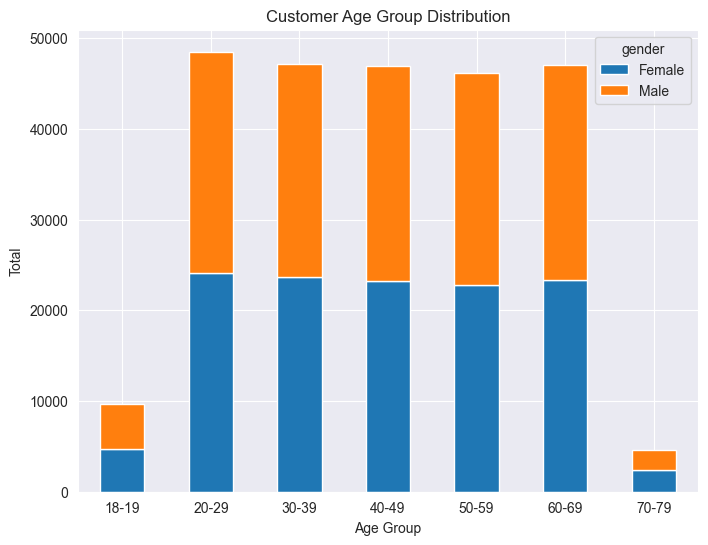

In [33]:
# Create age groups
bins = [18, 20, 30, 40, 50, 60, 70, 80]
labels = ['18-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
# df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

df_grouped = df.groupby([pd.cut(df['age'], bins=bins, labels=labels, right=False), 'gender']).size().unstack()
df_grouped.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Customer Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Total')
plt.xticks(rotation=0)
plt.show()

In [34]:
df.head(20)

,customer_id,date,time,product_category,product_price,quantity,total_purchase,payment_method,returns,customer_name,age,gender,churn
0,44605,2023-05-03,21:30:02,Home,177,1,177,PayPal,yes,John Rivera,31,Female,no
1,44605,2021-05-16,13:57:44,Electronics,174,3,522,PayPal,yes,John Rivera,31,Female,no
2,44605,2020-07-13,06:16:57,Books,413,1,413,Credit Card,yes,John Rivera,31,Female,no
3,44605,2023-01-17,13:14:36,Electronics,396,3,1188,Cash,no,John Rivera,31,Female,no
4,44605,2021-05-01,11:29:27,Books,259,4,1036,PayPal,yes,John Rivera,31,Female,no
5,13738,2022-08-25,06:48:33,Home,191,3,573,Credit Card,yes,Lauren Johnson,27,Female,no
6,13738,2023-07-25,05:17:24,Electronics,205,1,205,Credit Card,unknown,Lauren Johnson,27,Female,no
7,13738,2023-02-05,19:31:48,Books,370,5,1850,Cash,yes,Lauren Johnson,27,Female,no
8,13738,2021-12-21,03:29:05,Home,12,2,24,Cash,unknown,Lauren Johnson,27,Female,no
9,13738,2023-02-09,00:53:14,Electronics,40,4,160,Cash,no,Lauren Johnson,27,Female,no


In [35]:
# customer_total_purchase = df.groupby('Customer Name')['Total Purchase'].sum()
# top_10_customers = customer_total_purchase.nlargest(10)
# top_10_customers.plot(kind='bar', figsize=(15, 6))
# plt.title('Top 10 Customers with the Highest Spending')
# plt.xlabel('Customers')
# plt.ylabel('Total Spending')
# plt.xticks(rotation=0)
# plt.show()

In [36]:
df.head(10)

,customer_id,date,time,product_category,product_price,quantity,total_purchase,payment_method,returns,customer_name,age,gender,churn
0,44605,2023-05-03,21:30:02,Home,177,1,177,PayPal,yes,John Rivera,31,Female,no
1,44605,2021-05-16,13:57:44,Electronics,174,3,522,PayPal,yes,John Rivera,31,Female,no
2,44605,2020-07-13,06:16:57,Books,413,1,413,Credit Card,yes,John Rivera,31,Female,no
3,44605,2023-01-17,13:14:36,Electronics,396,3,1188,Cash,no,John Rivera,31,Female,no
4,44605,2021-05-01,11:29:27,Books,259,4,1036,PayPal,yes,John Rivera,31,Female,no
5,13738,2022-08-25,06:48:33,Home,191,3,573,Credit Card,yes,Lauren Johnson,27,Female,no
6,13738,2023-07-25,05:17:24,Electronics,205,1,205,Credit Card,unknown,Lauren Johnson,27,Female,no
7,13738,2023-02-05,19:31:48,Books,370,5,1850,Cash,yes,Lauren Johnson,27,Female,no
8,13738,2021-12-21,03:29:05,Home,12,2,24,Cash,unknown,Lauren Johnson,27,Female,no
9,13738,2023-02-09,00:53:14,Electronics,40,4,160,Cash,no,Lauren Johnson,27,Female,no


In [37]:
df.nunique()

customer_id         49661
date                 1352
time                81683
product_category        4
product_price         491
quantity                5
total_purchase       1459
payment_method          3
returns                 3
customer_name       39878
age                    53
gender                  2
churn                   2
dtype: int64

In [38]:
total_revenue = df['total_purchase'].sum()
print(f'Total Revenue: ${total_revenue:.2f}')

Total Revenue: $191488665.00


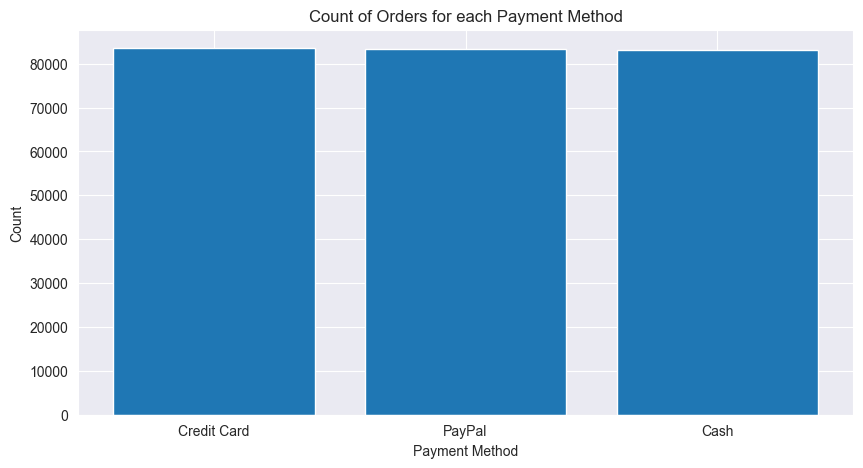

In [39]:
method = df['payment_method'].value_counts()
column = method.keys()
value = method.values
plt.figure(figsize=(10, 5))
plt.bar(column, value)
plt.title('Count of Orders for each Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

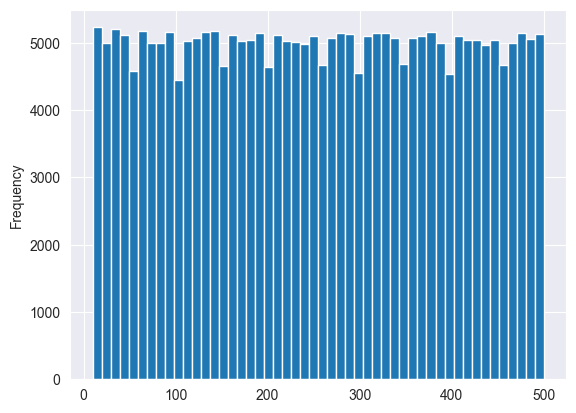

In [40]:
df['product_price'].plot(kind='hist', bins=50)
plt.show()

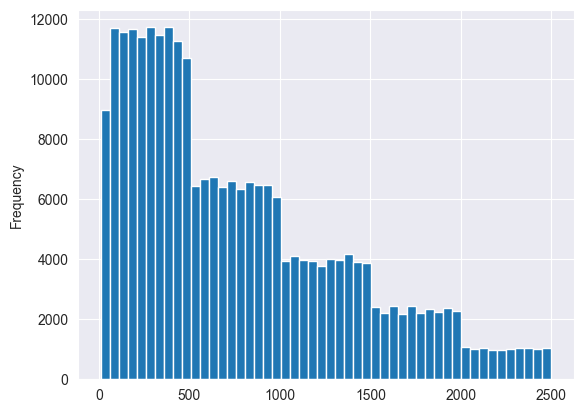

In [41]:
df['total_purchase'].plot(kind='hist', bins=50)
plt.show()

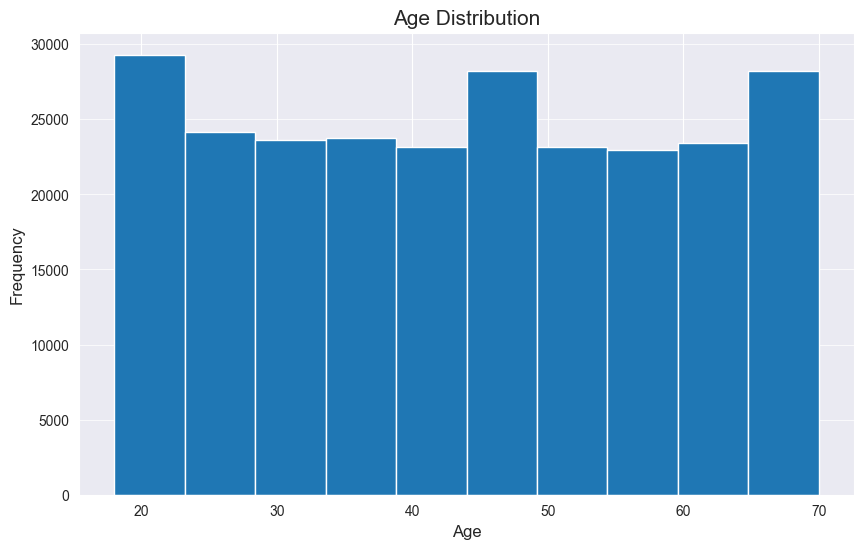

In [42]:
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=10)
plt.title('Age Distribution', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   customer_id       250000 non-null  int64         
 1   date              250000 non-null  datetime64[ns]
 2   time              250000 non-null  object        
 3   product_category  250000 non-null  object        
 4   product_price     250000 non-null  int64         
 5   quantity          250000 non-null  int64         
 6   total_purchase    250000 non-null  int64         
 7   payment_method    250000 non-null  object        
 8   returns           250000 non-null  object        
 9   customer_name     250000 non-null  object        
 10  age               250000 non-null  int64         
 11  gender            250000 non-null  object        
 12  churn             250000 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(7)
memory usage: 24.

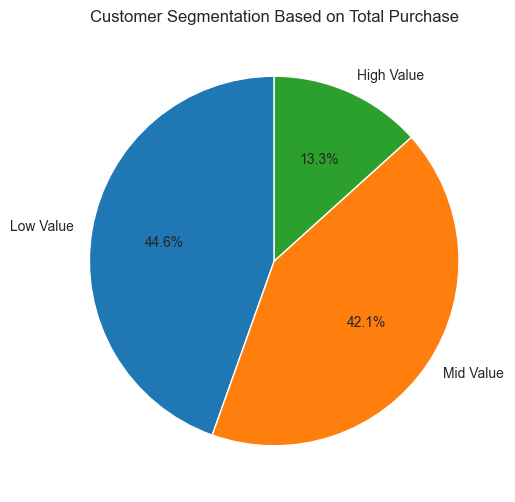

In [44]:
low_value_threshold = 500
high_value_threshold = 1500

def customers_segmentation(total_purchase_amount):
    if total_purchase_amount <= low_value_threshold:
        return "Low Value"
    elif total_purchase_amount <= high_value_threshold:
        return "Mid Value"
    else:
        return "High Value"

# df['Customer Segment'] = df['Total Purchase Amount'].apply(categorize_customers)

# Print the count of customers in each segment
segment_counts = df['total_purchase'].apply(customers_segmentation).value_counts()

plt.figure(figsize=(6, 6))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Customer Segmentation Based on Total Purchase')
plt.show()

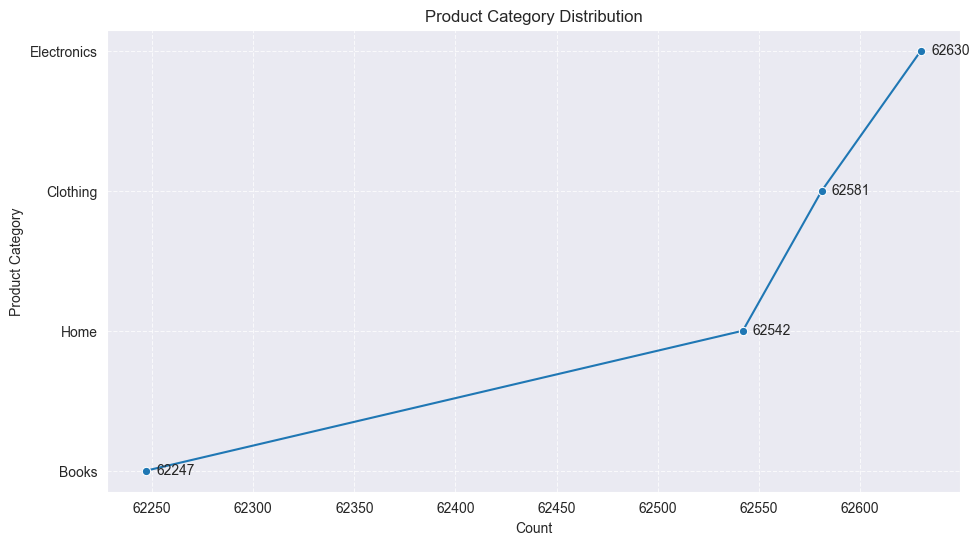

In [45]:
product_category_distribution = df['product_category'].value_counts().reset_index()
product_category_distribution.columns = ['product_category', 'count']

product_category_distribution = product_category_distribution.sort_values(by='count', ascending=False)

plt.figure(figsize=(11, 6))
sns.lineplot(data=product_category_distribution, x='count', y='product_category', marker='o')
plt.title('Product Category Distribution')
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.grid(True, linestyle='--', alpha=0.75)

for index, row in product_category_distribution.iterrows():
    plt.text(row['count'] + 5, index, f'{row["count"]}', va='center', fontsize=10)

plt.show()

C:\Users\Vu Tien Phat\AppData\Local\Temp\ipykernel_7492\2283005079.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=product_category_sales, x='product_category', y='total_purchase', palette='viridis', errcolor=None, width=0.5)


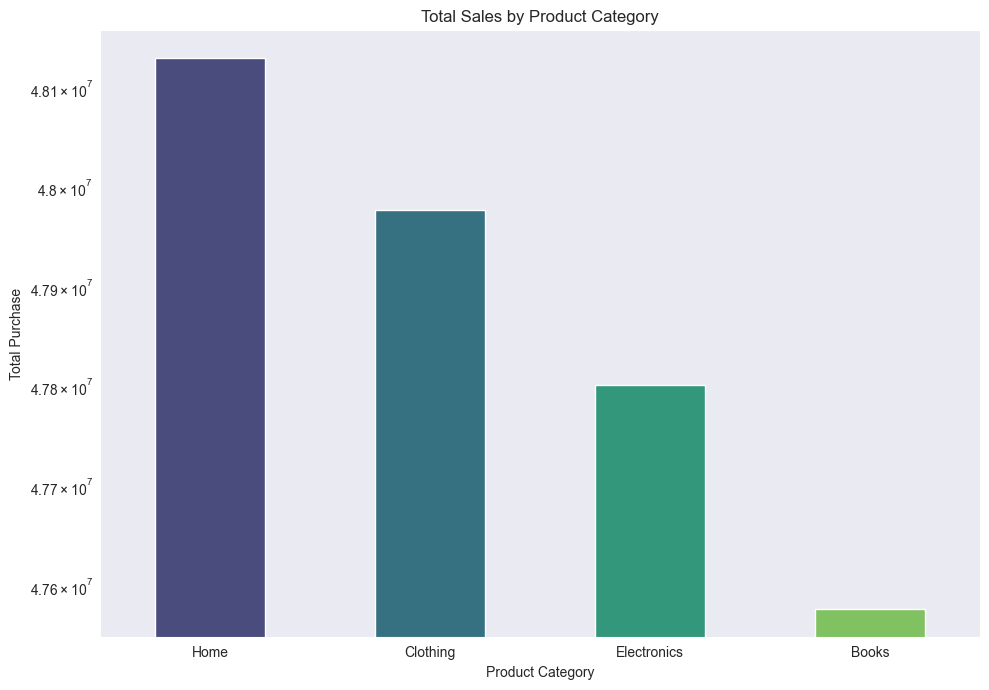

In [46]:
product_category_sales = df.groupby('product_category')['total_purchase'].sum().reset_index()
product_category_sales = product_category_sales.sort_values(by='total_purchase', ascending=False)

plt.figure(figsize=(10,7))
ax = sns.barplot(data=product_category_sales, x='product_category', y='total_purchase', palette='viridis', errcolor=None, width=0.5)
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Purchase')

ax.set_yscale('log')

plt.xticks()
plt.tight_layout()
plt.show()